# Inteligência Artificial para categorizar clientes

### O dataset usado nesse notebook foi retirado do Kaggle abaixo.
https://www.kaggle.com/rainbowgirl/clustering-categorical-peoples-interests

Nesse notebook está apenas uma demonsração de como seria possível dividir clientes do banco, para poder fazer recomendações mais personalizadas, isso tudo utilizando inteligência artificial

### Primeiro passo é carregar e tratar os dados do dataset

In [13]:
import os

#script_folder = os.path.dirname(os.path.realpath(__file__)) + '\\'
script_folder = 'E:/Coisas/igao-4-hackaton-safra/'

In [6]:
import pandas as pd

# importa arquivo
df = pd.read_csv( script_folder + 'kaggle_Interests_group.csv' )

In [7]:
# preenche os dados vazios com 0
df_na = df.fillna(0)

### Para categorizar nossos clientes, vamos usar o método KMens, um algoritmo de machine learning do tipo unsupervised learning

In [14]:
from sklearn.cluster import KMeans

# treina o modelo
df_ineteresses = df_na.iloc[:, 2:]
n_kmax = 15
lista_inertias = []
for i in range(1, n_kmax):
    km = KMeans(  n_clusters=i , init='random', n_init=5, max_iter=150, random_state=0 )
    km.fit( df_ineteresses )
    lista_inertias.append(  km.inertia_  )

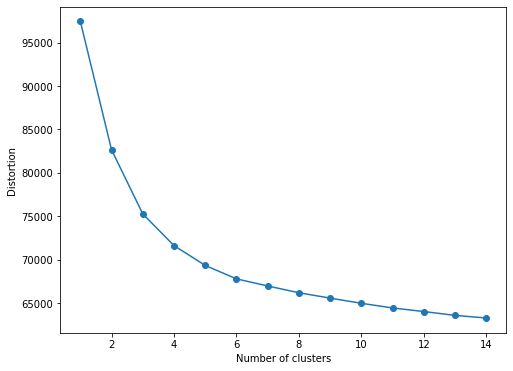

In [15]:
import matplotlib.pyplot as plt

# plot
plt.figure( figsize=(8,6) )
plt.plot(range(1, n_kmax), lista_inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

### Utilizando o método Elbow para analisar o gráfico, podemos ver que o cotovelo parece estar em 4 clusters (que é a quantidade de clusters que o próprio dataset já vem separado)

In [38]:
n_cluster = 4

km = KMeans( n_clusters=n_cluster, init='random', max_iter=500, random_state=0, n_init=20 )
km.fit( df_ineteresses )

KMeans(init='random', max_iter=400, n_clusters=4, n_init=5, random_state=0)

### Com o modelo treinado, vamos cruzar as predições com  dataset original para ver quais os principais interesses de cada grupo

In [39]:
y_km = km.predict( df_ineteresses )
pessoa = df_ineteresses.index
df_cluster = pd.Series( data=y_km, name='cluster', index=pessoa )
df_cluster.value_counts()

2    2025
0    1679
3    1659
1     977
Name: cluster, dtype: int64

In [40]:
df_na_cluster = df_na.merge( df_cluster, how='left', left_index=True, right_index=True )
df_na_cluster.head()

,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,...,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217,cluster
0,C,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,C,43,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
2,C,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3
3,C,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3
4,C,36,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3


### Grupo 0

In [55]:
df_na_cluster0 = df_na_cluster[df_na_cluster['cluster'] == 0]
df_na_cluster0.iloc[:,2:-1].sum().sort_values(ascending=False)

interest183    1680.0
interest83     1680.0
interest58     1680.0
interest162    1679.0
interest110    1679.0
                ...  
interest207       0.0
interest167       0.0
interest168       0.0
interest96        0.0
interest94        0.0
Length: 217, dtype: float64

### Grupo 1

In [56]:
df_na_cluster1 = df_na_cluster[df_na_cluster['cluster'] == 1]
df_na_cluster1.iloc[:,2:-1].sum().sort_values(ascending=False)

interest183    819.0
interest162    733.0
interest83     616.0
interest78     497.0
interest80     464.0
               ...  
interest53       0.0
interest188      0.0
interest121      0.0
interest56       0.0
interest108      0.0
Length: 217, dtype: float64

### Grupo 2

In [53]:
df_na_cluster2 = df_na_cluster[df_na_cluster['cluster'] == 2]
df_na_cluster2.iloc[:,2:-1].sum().sort_values(ascending=False)

interest58     2027.0
interest183    2027.0
interest110    2027.0
interest162    2027.0
interest83     2027.0
                ...  
interest150       0.0
interest103       0.0
interest161       0.0
interest31        0.0
interest141       0.0
Length: 217, dtype: float64

### Grupo 3

In [54]:
df_na_cluster3 = df_na_cluster[df_na_cluster['cluster'] == 3]
df_na_cluster3.iloc[:,2:-1].sum().sort_values(ascending=False)

interest183    1659.0
interest162    1659.0
interest83     1659.0
interest58     1653.0
interest110    1639.0
                ...  
interest27        0.0
interest173       0.0
interest123       0.0
interest94        0.0
interest76        0.0
Length: 217, dtype: float64

### Para aplicar isso para clientes do banco, teriamos que escolher as perguntas de sim ou não que usariamos como interesses, para assim clusterizar eles e poder fazer recomendações personalizadas